# Playing around to familiarize with the datasets

## OWID Datasets

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df_owid = pd.read_csv(file_path, error_bad_lines=False)
df_owid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113621,ZWE,Africa,Zimbabwe,2021-08-28,124367.0,131.0,268.571,4390.0,16.0,22.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
113622,ZWE,Africa,Zimbabwe,2021-08-29,124437.0,70.0,255.000,4401.0,11.0,21.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
113623,ZWE,Africa,Zimbabwe,2021-08-30,124581.0,144.0,225.714,4416.0,15.0,17.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
113624,ZWE,Africa,Zimbabwe,2021-08-31,124773.0,192.0,207.571,4419.0,3.0,14.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [30]:
#dividing relevant columns into separate dataframes
id = df_owid.loc[:, "iso_code":"date"]

cases = pd.concat([id, df_owid.loc[:, "total_cases":"new_cases_smoothed_per_million"]], axis=1)

deaths = pd.concat([id, df_owid.loc[:, "total_deaths":"new_deaths_smoothed_per_million"]], axis=1)

hospital = pd.concat([id, df_owid.loc[:, "icu_patients":"weekly_hosp_admissions_per_million"]], axis=1)

tests = pd.concat([id, df_owid.loc[:, "total_tests":"tests_units"]], axis=1)

vacc = pd.concat([id, df_owid.loc[:, "total_vaccinations":"new_vaccinations_smoothed_per_million"]], axis=1)

others = pd.concat([id,df_owid.loc[:, "iso_code":"excess_mortality"]], axis=1)


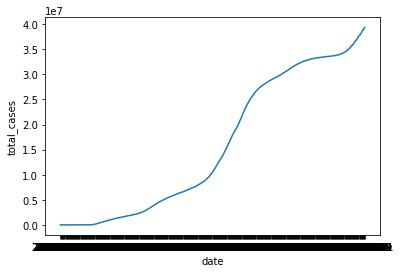

In [55]:
#US total_cases graph
sns.lineplot(x = 'date', y='total_cases', data = df_owid[df_owid["location"]=="United States"])

In [40]:
vacc[vacc["location"]=="Cambodia"].dropna().tail()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million
17770,KHM,Asia,Cambodia,2021-08-28,18535210.0,10440004.0,8342770.0,585454.0,197878.0,197615.0,109.38,61.61,49.23,3.45,11661.0
17771,KHM,Asia,Cambodia,2021-08-29,18714426.0,10562995.0,8392316.0,599722.0,179216.0,200078.0,110.43,62.33,49.52,3.54,11806.0
17772,KHM,Asia,Cambodia,2021-08-30,18912634.0,10693964.0,8458093.0,610428.0,198208.0,194847.0,111.60,63.10,49.91,3.60,11498.0
17773,KHM,Asia,Cambodia,2021-08-31,19085923.0,10801691.0,8525970.0,616561.0,173289.0,190284.0,112.62,63.74,50.31,3.64,11229.0
17774,KHM,Asia,Cambodia,2021-09-01,19246143.0,10894597.0,8594733.0,624380.0,160220.0,184716.0,113.57,64.29,50.72,3.68,10900.0
